# Made by Bohdan Bilokon, FB-11mp

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# Linear regression

In [2]:
np.random.seed(10)
count_points = 1000
a = 2.4
b = 0.6
noise = np.random.normal(0, 1, count_points)
x = np.random.uniform(0, 5, count_points)
y = a * x + b + noise

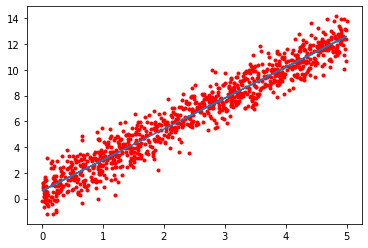

In [3]:
plt.scatter(x, y, marker = '.', color = 'r')
plt.plot()
plt.plot(x, a * x + b)

In [4]:
new_a = 0
new_b = 0
L = 0.1
epochs = 1000
mse = []

for i in range(epochs):
    y_pred = new_a * x + new_b
    gradient_a = (-1 / count_points) * sum(x * (y - y_pred))
    gradient_b = (-1 / count_points) * sum(y - y_pred)
    mse.append((1 / (2 * count_points)) * sum((y_pred-y)**2))
    len_mse = len(mse)
    if mse[len_mse - 1] > mse[len_mse - 2]:
        break
    new_a = new_a - L * gradient_a
    new_b = new_b - L * gradient_b

In [5]:
print(f'New a: {round(new_a, 3)}')
print(f'New b: {round(new_b, 3)}')
print(f'Deviation a: {round(100*abs(a - new_a)/a, 2)} %')
print(f'Deviation b: {round(100*abs(b - new_b)/b, 2)} %')
len(mse)

New a: 2.405
New b: 0.573
Deviation a: 0.22 %
Deviation b: 4.56 %


541

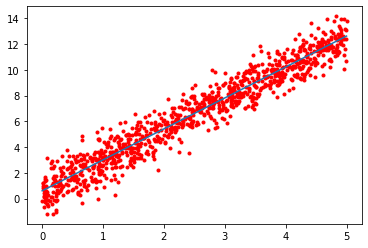

In [6]:
y_pred = new_a * x + b
plt.scatter(x, y, marker = '.', color = 'r')
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)])
plt.show()

# Logistic regression

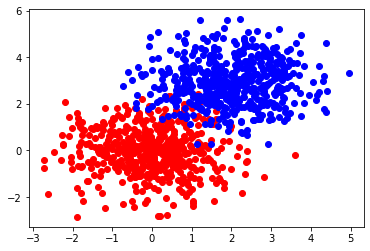

In [7]:
cov1 = [0,0]
cov2 = [2,3]
n = 500
train_x1 = np.matlib.repmat(cov1,n,1)+np.random.randn(n,len(cov1))
train_x1 = np.column_stack((train_x1, [0 for i in range(n)]))
train_x2 = np.matlib.repmat(cov2, n,1)+np.random.randn(n,len(cov2))
train_x2 = np.column_stack((train_x2, [1 for i in range(n)]))
plt.scatter(train_x1[:,0], train_x1[:,1], color="red")
plt.scatter(train_x2[:,0], train_x2[:,1], color="blue")
plt.show()

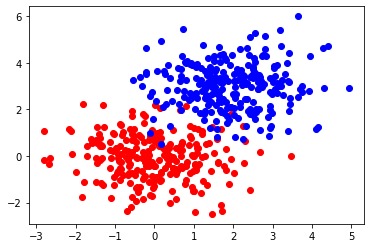

In [8]:
test_n = 250
test_x1 = np.matlib.repmat(cov1,test_n,1)+np.random.randn(test_n,len(cov1))
test_x1 = np.column_stack((test_x1, [0 for i in range(test_n)]))
test_x2 = np.matlib.repmat(cov2, test_n,1)+np.random.randn(test_n,len(cov2))
test_x2 = np.column_stack((test_x2, [1 for i in range(test_n)]))
plt.scatter(test_x1[:,0], test_x1[:,1], color="red")
plt.scatter(test_x2[:,0], test_x2[:,1], color="blue")
plt.show()

In [9]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def gradients(x, y, y_predict):
    gradient_weight = (1/len(x))*np.dot(x.T, (y_predict - y))
    gradient_bias = (1/len(x))*np.sum((y_predict - y)) 
    return gradient_weight, gradient_bias

def loss(x, y, y_predict):
    return (-1/len(x)*((y*np.log(y_predict))-(np.ones(len(x))-y)*np.log(np.ones(len(x))-y_predict)).sum())

def prediction(weight, bias, data):
    a = sigmoid(np.dot(data, weight) + bias)
    return [1 if i >= 0.5 else 0 for i in a]

def train(x, y, epochs, lr):
    weight = [0, 0]
    bias = 0
    for i in range(epochs):
        y_predict = sigmoid(np.dot(x, weight)+bias)
        gradient_weight, gradient_bias = gradients(x, y, y_predict)
        weight -= lr * gradient_weight
        bias -= lr * gradient_bias
    losses = loss(x, y, y_predict)
    return weight, bias, losses

In [10]:
train_data = np.concatenate((train_x1, train_x2), axis = 0)
test_data = np.concatenate((test_x1, test_x2), axis = 0)

weights, bias, loss = train(train_data[::2,0:2], test_data[:,2], epochs=2000, lr=0.01)
print(f"loss value is {round(loss, 3)}")

loss value is -0.077


In [11]:
test_predict = prediction(weights, bias, test_data[:,0:2])
print("model parameters: ", [round(weight, 3) for weight in weights], round(bias, 3))
print(f"accuracy: {np.sum(test_data[:,2]==test_predict)/2/test_n*100} %")

model parameters:  [0.772, 1.174] -1.894
accuracy: 95.8 %


In [12]:
x =  np.linspace(-3,5)
predict_x = (-weights[0]/weights[1])*x - bias/weights[1]

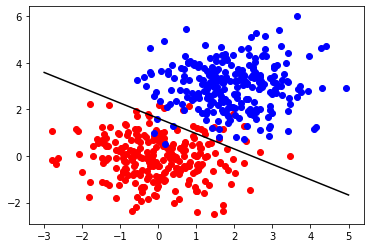

In [13]:
plt.figure()
plt.scatter(test_x1[:,0], test_x1[:,1], color="red")
plt.scatter(test_x2[:,0], test_x2[:,1], color="blue")
plt.plot(x, predict_x, "black")